In [1]:
import re
from Bio import SeqIO
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import logomaker
import pybedtools as bt
from scipy import stats

In [126]:
def read_pwm(filename):
    pwms = defaultdict(list)
    with open(filename) as infile:
        for line in infile:
            if line.startswith(';'):
                continue
            line = line.strip()
            hit = re.match('>(Danio_rerio_g\d+\.t1)', line)
            if hit:
                key = hit.group(1)
            else:
                pwms[key].append([float(i) for i in line.split()])
    exclude = []
    for key, val in pwms.items():
        if len(val) != 4:
            exclude.append(key)
        elif len(set([len(val[0]), len(val[1]), len(val[2]), len(val[3])])) != 1:
            exclude.append(key)
            
    return {key: np.array(val) for (key, val) in pwms.items() if key not in exclude}

def extract_sequence(matrix):
    seq = ''
    nucs = {0: 'A', 1: 'C', 2: 'G', 3: 'T'}
    m, n = matrix.shape
    for j in range(n):
        seq += nucs[matrix[:, j].argmax()]
    return seq

ATTATTTTAGATGAAGTGC


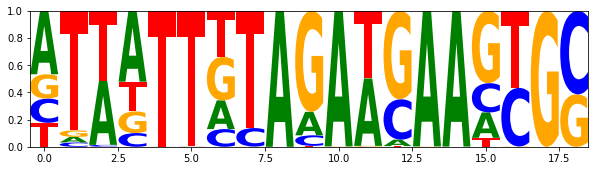

In [127]:
pwms = read_pwm('../data/binding-predictions/Danio_rerio_augustus_finz.aa.pwm')
log_df = pd.DataFrame(pwms['Danio_rerio_g10.t1'].T, columns = ['A', 'C', 'G', 'T'])
logo_logo = logomaker.Logo(log_df)
seq = extract_sequence(pwms['Danio_rerio_g10.t1'])
print(seq)

In [128]:
with open('../data/binding-predictions/Danio_rerio_augustus_finz.predictions.fa', 'w') as outfile:
    for key, val in pwms.items():
        seq = extract_sequence(val)
        outfile.write(f'>{key}\n{seq}\n')
with open('../data/binding-predictions/predfile.txt', 'w') as outfile:
    for key, val in pwms.items():
        seq = extract_sequence(val)
        outfile.write(f'{seq}\n')        